In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
df = pd.read_csv('./sample_data/Social_Network_Ads.csv')

In [12]:
df = df.iloc[:, 2:]

In [13]:
df.sample(5)

,Age,EstimatedSalary,Purchased
366,58,47000,1
182,32,117000,1
379,58,23000,1
231,39,42000,0
278,52,38000,1


In [14]:
X = df.drop('Purchased', axis=1)

In [15]:
y = df['Purchased']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [21]:
print(np.round(X_train_scaled_df.describe(), 2))

          Age  EstimatedSalary
count  280.00           280.00
mean     0.00             0.00
std      1.00             1.00
min     -1.95            -1.58
25%     -0.77            -0.78
50%     -0.08             0.02
75%      0.80             0.53
max      2.17             2.32


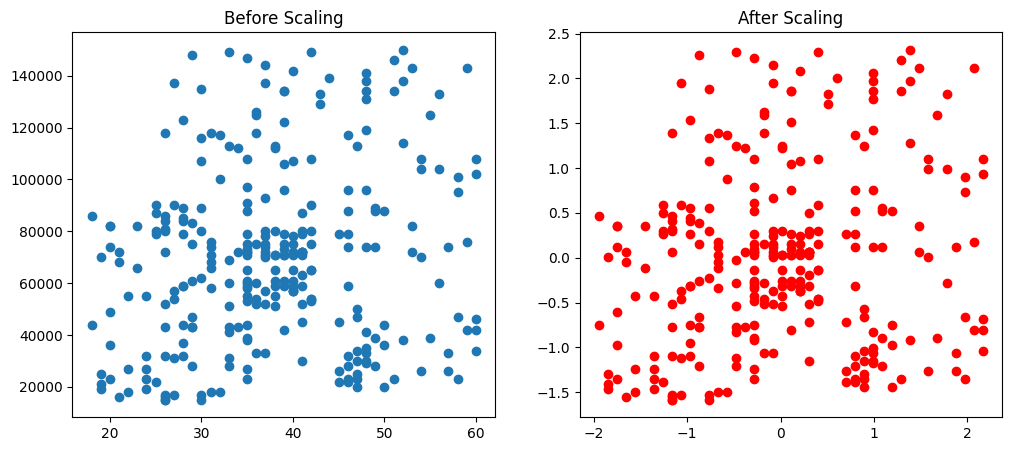

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled_df['Age'], X_train_scaled_df['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
lr_unscaled = LogisticRegression()

In [23]:
lr_unscaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
lr_scaled = LogisticRegression()

In [25]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
dt_unscaled = DecisionTreeClassifier()

In [37]:
dt_unscaled = DecisionTreeClassifier()
dt_unscaled.fit(X_train, y_train)
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score

y_pred_unscaled = dt_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy of the unscaled Decision Tree model: {accuracy_unscaled:.2f}")

Accuracy of the unscaled Decision Tree model: 0.88


In [36]:
y_pred_scaled = dt_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of the scaled Decision Tree model: {accuracy_scaled:.2f}")

Accuracy of the scaled Decision Tree model: 0.87


In [38]:
y_pred_unscaled_lr = lr_unscaled.predict(X_test)

accuracy_unscaled_lr = accuracy_score(y_test, y_pred_unscaled_lr)
print(f"Accuracy of the unscaled Logistic Regression model: {accuracy_unscaled_lr:.2f}")

Accuracy of the unscaled Logistic Regression model: 0.34


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


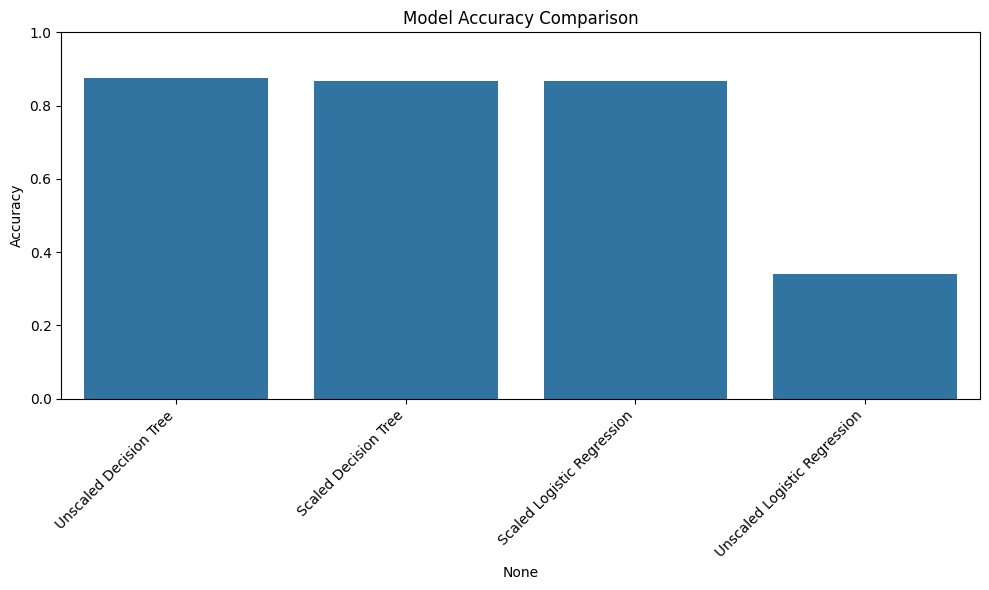

In [39]:
accuracies = {
    'Unscaled Decision Tree': accuracy_unscaled,
    'Scaled Decision Tree': accuracy_scaled,
    'Scaled Logistic Regression': accuracy_scaled_lr,
    'Unscaled Logistic Regression': accuracy_unscaled_lr
}

accuracy_series = pd.Series(accuracies)
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()